# Assignment 5
Devananth V -EP20BTECH11004

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from sklearn.mixture import GaussianMixture

Question 1

Shapiro Wilk test-Density : ShapiroResult(statistic=0.9246721863746643, pvalue=0.051220282912254333)
Shapiro Wilk test-log of density : ShapiroResult(statistic=0.9686306715011597, pvalue=0.5660613775253296)


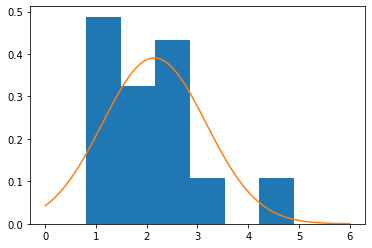

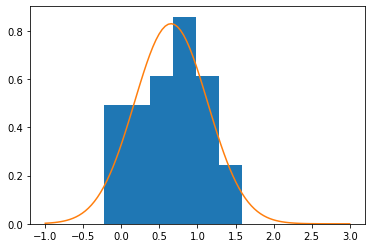

In [ ]:
ds = pd.read_csv('data.txt', delim_whitespace=True, header=None, names=["Number","Name","Density","Error"])
den = ds["Density"].to_numpy()
log_den = np.log(den)
print("Shapiro Wilk test-Density :",shapiro(den))
print("Shapiro Wilk test-log of density :",shapiro(log_den))
x = np.linspace(0, 6, 100)
plt.hist(den, bins = "auto", density = "True")
mu, std = stats.norm.fit(den)
pdf_den= stats.norm.pdf(x, mu, std)
plt.plot(x, pdf_den)
plt.show()
x = np.linspace(-1, 3, 100)
plt.hist(log_den, bins = "auto", density = "True")
mulog, stdlog = stats.norm.fit(log_den)
pdf_den_log = stats.norm.pdf(x, mulog, stdlog)
plt.plot(x, pdf_den_log)
plt.show()

Question 2

In [ ]:
cat=np.loadtxt("dat.txt",float)
col_hyades=[]
col_nonhyades=[]
for row in (cat):
  RA = row[2]
  DE = row[3]
  PRA = row[5]
  PDE = row[6]
  Color = row[8]
  if (50 < RA< 100 and 0 < DE < 25 and 90 < PRA <130 and -60<PDE< -10):
    col_hyades.append(Color)
  else:
    col_nonhyades.append(Color)
stats.ttest_ind(a=col_hyades, b=col_nonhyades, equal_var=True)

Ttest_indResult(statistic=-3.860436921860911, pvalue=0.00011582222192442334)

Question 3

Best fit converged: True
BIC: n_components =  2
Best fit converged: True
AIC: n_components =  2


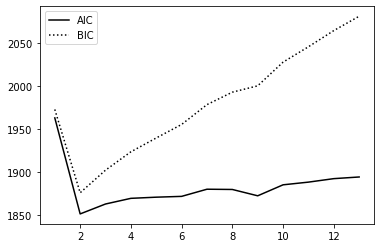

In [ ]:
data = np.loadtxt("https://people.iith.ac.in/shantanud/beppoSax.txt",float)
data = np.log10(data)
dat = data.reshape(-1, 1)
N = np.arange(1, 14)
def compute_GaussianMixture(N, covariance_type='full', max_iter=1000):
  models = [None for n in N]
  for i in range(len(N)):
    models[i] = GaussianMixture(n_components=N[i], max_iter=max_iter, covariance_type=covariance_type)
    models[i].fit(dat)
  return models
models = compute_GaussianMixture(N)
AIC = [m.aic(dat) for m in models]
BIC = [m.bic(dat) for m in models]
best_i = np.argmin(BIC)
best_gmm = models[best_i]
print("Best fit converged:", best_gmm.converged_)
print("BIC: n_components =  %i" % N[best_i])
i_best = np.argmin(AIC)
gmm_best = models[i_best]
print("Best fit converged:", gmm_best.converged_)
print("AIC: n_components =  %i" % N[i_best])
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, ':k', label='BIC')
plt.legend()
plt.show()